## Both x columns together

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import sklearn.model_selection as model_selection
from scipy import stats
from keras.models import load_model

NLPdata = pd.read_csv('nlpdata.csv')
NLPdata = NLPdata.to_numpy()

In [15]:
model = Sequential()
model.add(Dense(5, activation='selu', input_dim=2))
model.add(Dense(5, activation='selu'))
model.add(Dense(5, activation='selu'))
model.add(Dense(5, activation='selu'))
model.add(Dense(5, activation='selu'))
model.add(Dense(5, activation='selu'))
model.add(Dense(5, activation='selu'))
model.add(Dense(1, activation='linear')) 
#model.add(Dense(10, activation='softmax'))
model.compile(loss='mean_squared_error', optimizer='adagrad')
model.summary()

model.save('my_model.h5')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 5)                 15        
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_14 (Dense)             (None, 5)                

In [16]:
X_train3, X_test3, y_train3, y_test3 = model_selection.train_test_split(NLPdata[:,0:2], NLPdata[:,2], train_size=0.75,test_size=0.25, random_state=101)
#print ("X_train: ", X_train)
#print ("y_train: ", y_train)
#print ("X_test: ", X_test)
#print ("y_test: ", y_test)

In [17]:
X_train3 = X_train3.reshape(-1,2)
y_train3 = y_train3.reshape(-1,1)
X_test3 = X_test3.reshape(-1,2)
y_test3 = y_test3.reshape(-1,1)

#print ("X_train: ", X_train)
#print ("y_train: ", y_train)
#print ("X_test: ", X_test)
#print ("y_test: ", y_test)

In [74]:
model.fit(X_train3, y_train3, batch_size=10, epochs=250, verbose=1, validation_data=(X_test3, y_test3))

Epoch 1/250
28/28 [==============================] - 0s 6ms/step - loss: 0.1233 - val_loss: 0.0704
Epoch 2/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0670 - val_loss: 0.0528
Epoch 3/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0552 - val_loss: 0.0479
Epoch 4/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0504 - val_loss: 0.0463
Epoch 5/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0481 - val_loss: 0.0463
Epoch 6/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0469 - val_loss: 0.0463
Epoch 7/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0459 - val_loss: 0.0464
Epoch 8/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0452 - val_loss: 0.0462
Epoch 9/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0448 - val_loss: 0.0465
Epoch 10/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0443 - val_loss: 0.0466
Epoch 11/

Epoch 83/250
28/28 [==============================] - 0s 10ms/step - loss: 0.0396 - val_loss: 0.0476
Epoch 84/250
28/28 [==============================] - 0s 8ms/step - loss: 0.0396 - val_loss: 0.0476
Epoch 85/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0396 - val_loss: 0.0476
Epoch 86/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0476
Epoch 87/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0475
Epoch 88/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0475
Epoch 89/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0476
Epoch 90/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0476
Epoch 91/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0476
Epoch 92/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0396 - val_loss: 0.0475

28/28 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.0462
Epoch 246/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.0462
Epoch 247/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.0462
Epoch 248/250
28/28 [==============================] - 0s 2ms/step - loss: 0.0390 - val_loss: 0.0462
Epoch 249/250
28/28 [==============================] - 0s 2ms/step - loss: 0.0390 - val_loss: 0.0462
Epoch 250/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.0462


In [75]:
model.evaluate(X_test3, y_test3)

3/3 [==============================] - 0s 1ms/step - loss: 0.0462


0.04617321118712425

In [76]:
#Predict values test objects
X_new3 = X_test3
y_proba3 = model.predict(X_new3)
print(y_proba3)

[[-0.01162894]
 [ 0.10783748]
 [ 0.09897952]
 [ 0.14843437]
 [ 0.09897952]
 [ 0.10783748]
 [ 0.09897952]
 [ 0.08663131]
 [ 0.14119376]
 [ 0.09897952]
 [ 0.06699794]
 [ 0.10783748]
 [ 0.14248462]
 [ 0.09897952]
 [ 0.09897952]
 [ 0.12376982]
 [ 0.12376982]
 [ 0.05248038]
 [ 0.05248038]
 [ 0.08663131]
 [ 0.13399181]
 [ 0.16522716]
 [ 0.05248038]
 [ 0.09897952]
 [ 0.147298  ]
 [ 0.147298  ]
 [ 0.05248038]
 [ 0.13399181]
 [ 0.12376982]
 [ 0.0539538 ]
 [ 0.08663122]
 [ 0.08708395]
 [ 0.09897952]
 [-0.01162894]
 [ 0.05633302]
 [ 0.07079502]
 [ 0.0539538 ]
 [ 0.05633302]
 [ 0.08663131]
 [ 0.14843437]
 [ 0.10164289]
 [ 0.0539538 ]
 [ 0.10783748]
 [ 0.12376982]
 [ 0.09897952]
 [ 0.13738862]
 [ 0.12376982]
 [ 0.09897952]
 [ 0.08708388]
 [ 0.0539538 ]
 [ 0.09897952]
 [ 0.05248038]
 [ 0.05248038]
 [ 0.12376982]
 [ 0.12376982]
 [ 0.05248038]
 [ 0.13738862]
 [ 0.147298  ]
 [ 0.147298  ]
 [ 0.12376982]
 [ 0.09897952]
 [ 0.10783748]
 [ 0.14119376]
 [ 0.13399161]
 [-0.01162894]
 [ 0.12376982]
 [ 0.12376

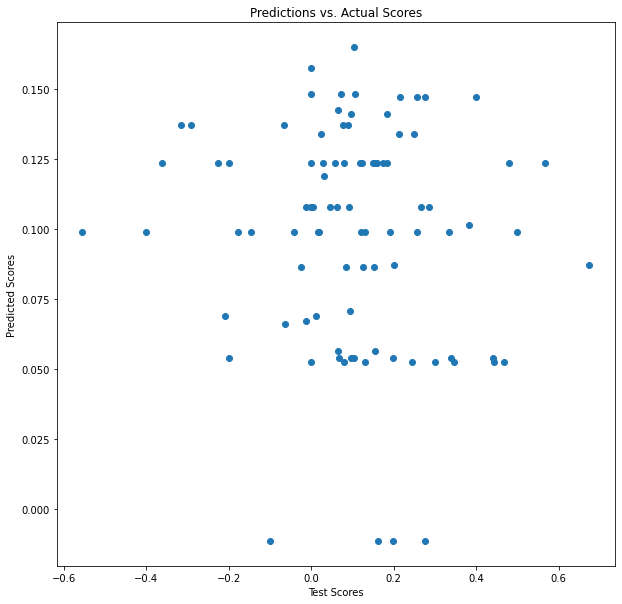

In [77]:
x3 = y_test3
y3 = y_proba3

plt.figure(figsize=(10,10))
plt.ylabel('Predicted Scores')
plt.xlabel('Test Scores')
plt.scatter(x3,y3)
plt.title("Predictions vs. Actual Scores")
#plt.legend()
plt.savefig('gaaaahvstest5.png')

In [78]:

stats.pearsonr(y3.flatten(), x3.flatten())[0]

-0.11267544848588773

Could train 100 versions of the network on same samples
calculate correlation for each
take standard deviation of the correlations
gives uncertainty on correlation due to sample size

In [25]:
correlations = []

def plswork():
    global X_train3, X_test3, y_train3, y_test3
    NLPdata = pd.read_csv('nlpdata.csv')
    NLPdata = NLPdata.to_numpy()
    model = load_model('my_model.h5')
    X_train3, X_test3, y_train3, y_test3 = model_selection.train_test_split(NLPdata[:,0:2], NLPdata[:,2], train_size=0.75,test_size=0.25, random_state=101)
    X_train3 = X_train3.reshape(-1,2)
    y_train3 = y_train3.reshape(-1,1)
    X_test3 = X_test3.reshape(-1,2)
    y_test3 = y_test3.reshape(-1,1)
    return X_train3, X_test3, y_train3, y_test3

In [26]:
for i in range(24):
    print('run through', +i+1)
    plswork()
    model.fit(X_train3, y_train3, batch_size=10, epochs=250, verbose=1, validation_data=(X_test3, y_test3))
    model.evaluate(X_test3, y_test3)
    X_new3 = X_test3
    y_proba3 = model.predict(X_new3)
    correlation = stats.pearsonr(y_proba3.flatten(), y_test3.flatten())[0]
    print(correlation)
    correlations.append(correlation)

run through 1
Epoch 1/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0410 - val_loss: 0.0473
Epoch 2/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0410 - val_loss: 0.0473
Epoch 3/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0410 - val_loss: 0.0473
Epoch 4/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0410 - val_loss: 0.0473
Epoch 5/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0409 - val_loss: 0.0473
Epoch 6/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0409 - val_loss: 0.0473
Epoch 7/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0409 - val_loss: 0.0473
Epoch 8/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0409 - val_loss: 0.0473
Epoch 9/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0409 - val_loss: 0.0473
Epoch 10/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0409 - val_loss: 0.

Epoch 83/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0407 - val_loss: 0.0471
Epoch 84/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0407 - val_loss: 0.0471
Epoch 85/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0407 - val_loss: 0.0471
Epoch 86/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0407 - val_loss: 0.0471
Epoch 87/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0407 - val_loss: 0.0470
Epoch 88/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0407 - val_loss: 0.0470
Epoch 89/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0407 - val_loss: 0.0471
Epoch 90/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0407 - val_loss: 0.0470
Epoch 91/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0407 - val_loss: 0.0470
Epoch 92/250
28/28 [==============================] - 0s 16ms/step - loss: 0.0407 - val_loss: 0.0470

28/28 [==============================] - 0s 4ms/step - loss: 0.0403 - val_loss: 0.0466
Epoch 246/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0403 - val_loss: 0.0466
Epoch 247/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0403 - val_loss: 0.0466
Epoch 248/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0403 - val_loss: 0.0466
Epoch 249/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0403 - val_loss: 0.0466
Epoch 250/250
3/3 [==============================] - 0s 1ms/step - loss: 0.0466
-0.14872602403801702
run through 2
Epoch 1/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0403 - val_loss: 0.0466
Epoch 2/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0403 - val_loss: 0.0466
Epoch 3/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0403 - val_loss: 0.0466
Epoch 4/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0403 - val_loss: 0.046

28/28 [==============================] - 0s 3ms/step - loss: 0.0402 - val_loss: 0.0464
Epoch 77/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0402 - val_loss: 0.0464
Epoch 78/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0402 - val_loss: 0.0464
Epoch 79/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0402 - val_loss: 0.0464
Epoch 80/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0402 - val_loss: 0.0464
Epoch 81/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0402 - val_loss: 0.0464
Epoch 82/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0402 - val_loss: 0.0464
Epoch 83/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0402 - val_loss: 0.0464
Epoch 84/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0402 - val_loss: 0.0464
Epoch 85/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0402 - val_loss: 0.0464
Epoch 86/250


28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0463
Epoch 239/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0463
Epoch 240/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0463
Epoch 241/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0462
Epoch 242/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0462
Epoch 243/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0462
Epoch 244/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0462
Epoch 245/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0462
Epoch 246/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0462
Epoch 247/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0462
Epoc

28/28 [==============================] - 0s 3ms/step - loss: 0.0398 - val_loss: 0.0461
Epoch 70/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0398 - val_loss: 0.0461
Epoch 71/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0398 - val_loss: 0.0461
Epoch 72/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0398 - val_loss: 0.0461
Epoch 73/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0398 - val_loss: 0.0461
Epoch 74/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0398 - val_loss: 0.0461
Epoch 75/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0398 - val_loss: 0.0461
Epoch 76/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0398 - val_loss: 0.0461
Epoch 77/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0398 - val_loss: 0.0461
Epoch 78/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0398 - val_loss: 0.0461
Epoch 79/250


28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0460
Epoch 232/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0397 - val_loss: 0.0460
Epoch 233/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0460
Epoch 234/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0460
Epoch 235/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0460
Epoch 236/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0460
Epoch 237/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0460
Epoch 238/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0460
Epoch 239/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0460
Epoch 240/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0460
Epoc

Epoch 62/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0460
Epoch 63/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0460
Epoch 64/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0460
Epoch 65/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0460
Epoch 66/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0460
Epoch 67/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0460
Epoch 68/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0460
Epoch 69/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0460
Epoch 70/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0460
Epoch 71/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0396 - val_loss: 0.0460


28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0458
Epoch 225/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0458
Epoch 226/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0458
Epoch 227/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0458
Epoch 228/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0458
Epoch 229/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0458
Epoch 230/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0458
Epoch 231/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0459
Epoch 232/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0458
Epoch 233/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0459
Epoc

Epoch 55/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0458
Epoch 56/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0458
Epoch 57/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0458
Epoch 58/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0458
Epoch 59/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0458
Epoch 60/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0458
Epoch 61/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0458
Epoch 62/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0458
Epoch 63/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0458
Epoch 64/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0458


28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0457
Epoch 218/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0457
Epoch 219/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0457
Epoch 220/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0457
Epoch 221/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0457
Epoch 222/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0457
Epoch 223/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0457
Epoch 224/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0457
Epoch 225/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0457
Epoch 226/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0457
Epoc

Epoch 48/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0456
Epoch 49/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0456
Epoch 50/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0456
Epoch 51/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0456
Epoch 52/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0456
Epoch 53/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0457
Epoch 54/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0456
Epoch 55/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0456
Epoch 56/250
28/28 [==============================] - 0s 8ms/step - loss: 0.0393 - val_loss: 0.0456
Epoch 57/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0393 - val_loss: 0.0456


28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0456
Epoch 211/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0456
Epoch 212/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0456
Epoch 213/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0456
Epoch 214/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0455
Epoch 215/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0456
Epoch 216/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0456
Epoch 217/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0456
Epoch 218/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0455
Epoch 219/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0455
Epoc

Epoch 122/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0454
Epoch 123/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0454
Epoch 124/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0454
Epoch 125/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0454
Epoch 126/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0454
Epoch 127/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0454
Epoch 128/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0454
Epoch 129/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0454
Epoch 130/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0454
Epoch 131/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_los

28/28 [==============================] - 0s 3ms/step - loss: 0.0391 - val_loss: 0.0454
Epoch 204/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0391 - val_loss: 0.0454
Epoch 205/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0391 - val_loss: 0.0454
Epoch 206/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0391 - val_loss: 0.0454
Epoch 207/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0391 - val_loss: 0.0454
Epoch 208/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0391 - val_loss: 0.0454
Epoch 209/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0391 - val_loss: 0.0454
Epoch 210/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0391 - val_loss: 0.0454
Epoch 211/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0391 - val_loss: 0.0454
Epoch 212/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0391 - val_loss: 0.0454
Epoc

Epoch 115/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0391 - val_loss: 0.0453
Epoch 116/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0391 - val_loss: 0.0453
Epoch 117/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0391 - val_loss: 0.0453
Epoch 118/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0391 - val_loss: 0.0453
Epoch 119/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0391 - val_loss: 0.0453
Epoch 120/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0391 - val_loss: 0.0453
Epoch 121/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0391 - val_loss: 0.0453
Epoch 122/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0391 - val_loss: 0.0453
Epoch 123/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0391 - val_loss: 0.0453
Epoch 124/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0391 - val_los

28/28 [==============================] - 0s 3ms/step - loss: 0.0391 - val_loss: 0.0453
Epoch 197/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0390 - val_loss: 0.0453
Epoch 198/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.0453
Epoch 199/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.0453
Epoch 200/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.0453
Epoch 201/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.0453
Epoch 202/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0390 - val_loss: 0.0453
Epoch 203/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0390 - val_loss: 0.0453
Epoch 204/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0390 - val_loss: 0.0453
Epoch 205/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0390 - val_loss: 0.0453
Epoc

Epoch 108/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0390 - val_loss: 0.0452
Epoch 109/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.0452
Epoch 110/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.0452
Epoch 111/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.0452
Epoch 112/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.0452
Epoch 113/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.0452
Epoch 114/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.0452
Epoch 115/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.0452
Epoch 116/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0390 - val_loss: 0.0452
Epoch 117/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0390 - val_los

28/28 [==============================] - 0s 4ms/step - loss: 0.0390 - val_loss: 0.0452
Epoch 190/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.0452
Epoch 191/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.0452
Epoch 192/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.0452
Epoch 193/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.0452
Epoch 194/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.0452
Epoch 195/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.0452
Epoch 196/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.0452
Epoch 197/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.0452
Epoch 198/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.0452
Epoc

28/28 [==============================] - 0s 4ms/step - loss: 0.0389 - val_loss: 0.0451
Epoch 102/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0389 - val_loss: 0.0451
Epoch 103/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0389 - val_loss: 0.0451
Epoch 104/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0389 - val_loss: 0.0451
Epoch 105/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0389 - val_loss: 0.0451
Epoch 106/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0389 - val_loss: 0.0451
Epoch 107/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0389 - val_loss: 0.0451
Epoch 108/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0389 - val_loss: 0.0451
Epoch 109/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0389 - val_loss: 0.0451
Epoch 110/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0389 - val_loss: 0.0452
Epoc

28/28 [==============================] - 0s 3ms/step - loss: 0.0389 - val_loss: 0.0451
Epoch 13/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0389 - val_loss: 0.0451
Epoch 14/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0389 - val_loss: 0.0451
Epoch 15/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0389 - val_loss: 0.0451
Epoch 16/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0389 - val_loss: 0.0451
Epoch 17/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0389 - val_loss: 0.0451
Epoch 18/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0389 - val_loss: 0.0451
Epoch 19/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0389 - val_loss: 0.0451
Epoch 20/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0388 - val_loss: 0.0451
Epoch 21/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0389 - val_loss: 0.0451
Epoch 22/250


28/28 [==============================] - 0s 4ms/step - loss: 0.0388 - val_loss: 0.0451
Epoch 95/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0388 - val_loss: 0.0451
Epoch 96/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0388 - val_loss: 0.0451
Epoch 97/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0388 - val_loss: 0.0451
Epoch 98/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0388 - val_loss: 0.0451
Epoch 99/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0388 - val_loss: 0.0451
Epoch 100/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0388 - val_loss: 0.0451
Epoch 101/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0388 - val_loss: 0.0451
Epoch 102/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0388 - val_loss: 0.0451
Epoch 103/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0388 - val_loss: 0.0451
Epoch 104

28/28 [==============================] - 0s 5ms/step - loss: 0.0388 - val_loss: 0.0451
Epoch 6/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0388 - val_loss: 0.0451
Epoch 7/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0388 - val_loss: 0.0451
Epoch 8/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0388 - val_loss: 0.0451
Epoch 9/250
28/28 [==============================] - 0s 7ms/step - loss: 0.0388 - val_loss: 0.0451
Epoch 10/250
28/28 [==============================] - 0s 7ms/step - loss: 0.0388 - val_loss: 0.0451
Epoch 11/250
28/28 [==============================] - 0s 7ms/step - loss: 0.0388 - val_loss: 0.0451
Epoch 12/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0388 - val_loss: 0.0451
Epoch 13/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0388 - val_loss: 0.0450
Epoch 14/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0388 - val_loss: 0.0450
Epoch 15/250
28/2

28/28 [==============================] - 0s 4ms/step - loss: 0.0388 - val_loss: 0.0450
Epoch 88/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0388 - val_loss: 0.0450
Epoch 89/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0388 - val_loss: 0.0450
Epoch 90/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0388 - val_loss: 0.0450
Epoch 91/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0388 - val_loss: 0.0450
Epoch 92/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0388 - val_loss: 0.0450
Epoch 93/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0388 - val_loss: 0.0450
Epoch 94/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0388 - val_loss: 0.0450
Epoch 95/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0388 - val_loss: 0.0450
Epoch 96/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0388 - val_loss: 0.0450
Epoch 97/250


28/28 [==============================] - 0s 4ms/step - loss: 0.0387 - val_loss: 0.0450
Epoch 250/250
3/3 [==============================] - 0s 1ms/step - loss: 0.0450
-0.05782499681903873
run through 13
Epoch 1/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0387 - val_loss: 0.0450
Epoch 2/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0387 - val_loss: 0.0450
Epoch 3/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0387 - val_loss: 0.0450
Epoch 4/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0387 - val_loss: 0.0450
Epoch 5/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0387 - val_loss: 0.0450
Epoch 6/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0387 - val_loss: 0.0450
Epoch 7/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0387 - val_loss: 0.0450
Epoch 8/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0387 - val_loss: 0.0450
Epoch

28/28 [==============================] - 0s 4ms/step - loss: 0.0387 - val_loss: 0.0450
Epoch 81/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0387 - val_loss: 0.0450
Epoch 82/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0387 - val_loss: 0.0450
Epoch 83/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0387 - val_loss: 0.0450
Epoch 84/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0387 - val_loss: 0.0450
Epoch 85/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0387 - val_loss: 0.0450
Epoch 86/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0387 - val_loss: 0.0450
Epoch 87/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0387 - val_loss: 0.0450
Epoch 88/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0387 - val_loss: 0.0450
Epoch 89/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0387 - val_loss: 0.0450
Epoch 90/250


28/28 [==============================] - 0s 4ms/step - loss: 0.0387 - val_loss: 0.0449
Epoch 243/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0387 - val_loss: 0.0449
Epoch 244/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0387 - val_loss: 0.0449
Epoch 245/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0387 - val_loss: 0.0449
Epoch 246/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0387 - val_loss: 0.0449
Epoch 247/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0387 - val_loss: 0.0449
Epoch 248/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0387 - val_loss: 0.0449
Epoch 249/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0387 - val_loss: 0.0449
Epoch 250/250
3/3 [==============================] - 0s 2ms/step - loss: 0.0449
-0.052748860298267204
run through 14
Epoch 1/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0387 - val_los

28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0449
Epoch 74/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0449
Epoch 75/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0449
Epoch 76/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0449
Epoch 77/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0449
Epoch 78/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0449
Epoch 79/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0449
Epoch 80/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0449
Epoch 81/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0449
Epoch 82/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0449
Epoch 83/250


28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0448
Epoch 236/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0386 - val_loss: 0.0448
Epoch 237/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0448
Epoch 238/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0448
Epoch 239/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0448
Epoch 240/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0448
Epoch 241/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0448
Epoch 242/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0448
Epoch 243/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0448
Epoch 244/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0448
Epoc

Epoch 66/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0386 - val_loss: 0.0447
Epoch 67/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0447
Epoch 68/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0447
Epoch 69/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0447
Epoch 70/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0386 - val_loss: 0.0447
Epoch 71/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0447
Epoch 72/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0447
Epoch 73/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0447
Epoch 74/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0447
Epoch 75/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0447


28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0447
Epoch 229/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0385 - val_loss: 0.0447
Epoch 230/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0447
Epoch 231/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0447
Epoch 232/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0447
Epoch 233/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0447
Epoch 234/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0447
Epoch 235/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0447
Epoch 236/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0447
Epoch 237/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0447
Epoc

Epoch 59/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 60/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 61/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 62/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0447
Epoch 63/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 64/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 65/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 66/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 67/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 68/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0446


28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 222/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 223/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 224/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 225/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 226/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 227/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 228/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 229/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 230/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0446
Epoc

Epoch 52/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 53/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 54/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 55/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 56/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 57/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 58/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 59/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 60/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 61/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0446


28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 215/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 216/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 217/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 218/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 219/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 220/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 221/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 222/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 223/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0446
Epoc

Epoch 126/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 127/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 128/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0446
Epoch 129/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0446
Epoch 130/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0446
Epoch 131/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0446
Epoch 132/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0446
Epoch 133/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0446
Epoch 134/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0446
Epoch 135/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_los

28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 208/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 209/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 210/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 211/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 212/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 213/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 214/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0446
Epoch 215/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0446
Epoch 216/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0446
Epoc

Epoch 119/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 120/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 121/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 122/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 123/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 124/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 125/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 126/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 127/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 128/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_los

28/28 [==============================] - 0s 6ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 201/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 202/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 203/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 204/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 205/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 206/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 207/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 208/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 209/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0384 - val_loss: 0.0445
Epoc

Epoch 112/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 113/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 114/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 115/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 116/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 117/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 118/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 119/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 120/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 121/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_los

28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 194/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 195/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 196/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 197/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 198/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 199/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 200/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 201/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 202/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoc

28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 106/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 107/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 108/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 109/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 110/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 111/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 112/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 113/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoch 114/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0445
Epoc

28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 17/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 18/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 19/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 20/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 21/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 22/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 23/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 24/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 25/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 26/250


28/28 [==============================] - 0s 6ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 99/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 100/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 101/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 102/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 103/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 104/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 105/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 106/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 107/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch

28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 10/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 11/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 12/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 13/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 14/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 15/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 16/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 17/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 18/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 19/250


28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 92/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 93/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 94/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 95/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 96/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 97/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 98/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 99/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 100/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 101/25

28/28 [==============================] - 0s 5ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 3/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 4/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 5/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 6/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 7/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 8/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 9/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 10/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 11/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 12/250
28/28 [

28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 85/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 86/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 87/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 88/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 89/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 90/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 91/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 92/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 93/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 94/250


28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 247/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 248/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 249/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0383 - val_loss: 0.0445
Epoch 250/250
3/3 [==============================] - 0s 2ms/step - loss: 0.0445
-0.024867021064287575


In [27]:
print(correlations)

[-0.14872602403801702, -0.1293706044198663, -0.121511609071129, -0.11316139794298553, -0.1036728431103279, -0.09561605863187671, -0.08626636069180228, -0.07636901299730922, -0.06885900984791649, -0.06662100878076814, -0.06285976484990334, -0.05782499681903873, -0.052748860298267204, -0.04529414173898282, -0.035980423447465146, -0.031222817244733338, -0.028451245318379625, -0.026242238435757764, -0.024332147947721566, -0.024078514181069117, -0.023566350102174675, -0.023949459290246684, -0.0233686115001058, -0.024867021064287575]


In [28]:
np.std(correlations)

0.03819470917183718

In [31]:
correlations = []

def plswork():
    global X_train, X_test, y_train, y_test
    NLPdata = pd.read_csv('nlpdata.csv')
    NLPdata = NLPdata.to_numpy()
    model = load_model('my_model.h5')
    X_train, X_test, y_train, y_test = model_selection.train_test_split(NLPdata[:,0:2], NLPdata[:,2], train_size=0.75,test_size=0.25, random_state=101)
    X_train = X_train.reshape(-1,2)
    y_train = y_train.reshape(-1,1)
    X_test = X_test.reshape(-1,2)
    y_test = y_test.reshape(-1,1)
    return X_train, X_test, y_train, y_test

In [32]:
for i in range(49):
    print('run through', +i+1)
    plswork()
    model.fit(X_train, y_train, batch_size=10, epochs=250, verbose=1, validation_data=(X_test, y_test))
    model.evaluate(X_test, y_test)
    X_new = X_test
    y_proba = model.predict(X_new)
    correlation = stats.pearsonr(y_proba.flatten(), y_test.flatten())[0]
    print(correlation)
    correlations.append(correlation)

run through 1
Epoch 1/250
28/28 [==============================] - 0s 6ms/step - loss: 2.1220 - val_loss: 1.5080
Epoch 2/250
28/28 [==============================] - 0s 3ms/step - loss: 1.2008 - val_loss: 0.9976
Epoch 3/250
28/28 [==============================] - 0s 4ms/step - loss: 0.8257 - val_loss: 0.7155
Epoch 4/250
28/28 [==============================] - 0s 4ms/step - loss: 0.6022 - val_loss: 0.5327
Epoch 5/250
28/28 [==============================] - 0s 4ms/step - loss: 0.4529 - val_loss: 0.4064
Epoch 6/250
28/28 [==============================] - 0s 4ms/step - loss: 0.3491 - val_loss: 0.3180
Epoch 7/250
28/28 [==============================] - 0s 4ms/step - loss: 0.2783 - val_loss: 0.2586
Epoch 8/250
28/28 [==============================] - 0s 4ms/step - loss: 0.2295 - val_loss: 0.2147
Epoch 9/250
28/28 [==============================] - 0s 5ms/step - loss: 0.1931 - val_loss: 0.1817
Epoch 10/250
28/28 [==============================] - 0s 6ms/step - loss: 0.1657 - val_loss: 0.

Epoch 83/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0588 - val_loss: 0.0587
Epoch 84/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0586 - val_loss: 0.0586
Epoch 85/250
28/28 [==============================] - 0s 7ms/step - loss: 0.0584 - val_loss: 0.0584
Epoch 86/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0583 - val_loss: 0.0583
Epoch 87/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0581 - val_loss: 0.0582
Epoch 88/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0579 - val_loss: 0.0580
Epoch 89/250
28/28 [==============================] - 0s 7ms/step - loss: 0.0577 - val_loss: 0.0579
Epoch 90/250
28/28 [==============================] - 0s 7ms/step - loss: 0.0576 - val_loss: 0.0578
Epoch 91/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0574 - val_loss: 0.0577
Epoch 92/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0572 - val_loss: 0.0576


28/28 [==============================] - 0s 3ms/step - loss: 0.0425 - val_loss: 0.0476
Epoch 246/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0424 - val_loss: 0.0476
Epoch 247/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0424 - val_loss: 0.0476
Epoch 248/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0424 - val_loss: 0.0476
Epoch 249/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0423 - val_loss: 0.0475
Epoch 250/250
3/3 [==============================] - 0s 1ms/step - loss: 0.0475
-0.06854557597318917
run through 2
Epoch 1/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0422 - val_loss: 0.0475
Epoch 2/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0422 - val_loss: 0.0475
Epoch 3/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0422 - val_loss: 0.0474
Epoch 4/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0421 - val_loss: 0.047

28/28 [==============================] - 0s 3ms/step - loss: 0.0407 - val_loss: 0.0464
Epoch 77/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0407 - val_loss: 0.0464
Epoch 78/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0407 - val_loss: 0.0464
Epoch 79/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0407 - val_loss: 0.0463
Epoch 80/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0407 - val_loss: 0.0463
Epoch 81/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0407 - val_loss: 0.0463
Epoch 82/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0463
Epoch 83/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0463
Epoch 84/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0463
Epoch 85/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0463
Epoch 86/250


28/28 [==============================] - 0s 3ms/step - loss: 0.0402 - val_loss: 0.0457
Epoch 239/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0402 - val_loss: 0.0457
Epoch 240/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0402 - val_loss: 0.0457
Epoch 241/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0402 - val_loss: 0.0457
Epoch 242/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0402 - val_loss: 0.0457
Epoch 243/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0402 - val_loss: 0.0457
Epoch 244/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0402 - val_loss: 0.0457
Epoch 245/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0402 - val_loss: 0.0457
Epoch 246/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0402 - val_loss: 0.0457
Epoch 247/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0402 - val_loss: 0.0457
Epoc

28/28 [==============================] - 0s 3ms/step - loss: 0.0402 - val_loss: 0.0455
Epoch 70/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0402 - val_loss: 0.0455
Epoch 71/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0402 - val_loss: 0.0455
Epoch 72/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0402 - val_loss: 0.0455
Epoch 73/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0402 - val_loss: 0.0455
Epoch 74/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0402 - val_loss: 0.0455
Epoch 75/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0402 - val_loss: 0.0455
Epoch 76/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0402 - val_loss: 0.0455
Epoch 77/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0402 - val_loss: 0.0455
Epoch 78/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0402 - val_loss: 0.0455
Epoch 79/250


28/28 [==============================] - 0s 3ms/step - loss: 0.0401 - val_loss: 0.0452
Epoch 232/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0401 - val_loss: 0.0452
Epoch 233/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0401 - val_loss: 0.0452
Epoch 234/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0401 - val_loss: 0.0452
Epoch 235/250
28/28 [==============================] - 0s 10ms/step - loss: 0.0401 - val_loss: 0.0452
Epoch 236/250
28/28 [==============================] - 0s 8ms/step - loss: 0.0401 - val_loss: 0.0452
Epoch 237/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0401 - val_loss: 0.0452
Epoch 238/250
28/28 [==============================] - 0s 8ms/step - loss: 0.0401 - val_loss: 0.0452
Epoch 239/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0401 - val_loss: 0.0452
Epoch 240/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0401 - val_loss: 0.0452
Epo

Epoch 62/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0400 - val_loss: 0.0451
Epoch 63/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0400 - val_loss: 0.0451
Epoch 64/250
28/28 [==============================] - 0s 17ms/step - loss: 0.0400 - val_loss: 0.0451
Epoch 65/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0400 - val_loss: 0.0451
Epoch 66/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0400 - val_loss: 0.0451
Epoch 67/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0400 - val_loss: 0.0451
Epoch 68/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0400 - val_loss: 0.0451
Epoch 69/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0400 - val_loss: 0.0451
Epoch 70/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0400 - val_loss: 0.0451
Epoch 71/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0400 - val_loss: 0.0451

28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0449
Epoch 225/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0399 - val_loss: 0.0449
Epoch 226/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0400 - val_loss: 0.0449
Epoch 227/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0449
Epoch 228/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0449
Epoch 229/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0449
Epoch 230/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0449
Epoch 231/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0399 - val_loss: 0.0449
Epoch 232/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0449
Epoch 233/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0449
Epoc

Epoch 55/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0448
Epoch 56/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0448
Epoch 57/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0448
Epoch 58/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0448
Epoch 59/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0448
Epoch 60/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0448
Epoch 61/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0448
Epoch 62/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0448
Epoch 63/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0448
Epoch 64/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0448


28/28 [==============================] - 0s 4ms/step - loss: 0.0399 - val_loss: 0.0446
Epoch 218/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0446
Epoch 219/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0446
Epoch 220/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0446
Epoch 221/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0446
Epoch 222/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0446
Epoch 223/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0399 - val_loss: 0.0446
Epoch 224/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0399 - val_loss: 0.0446
Epoch 225/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0446
Epoch 226/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0399 - val_loss: 0.0446
Epoc

Epoch 48/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0399 - val_loss: 0.0446
Epoch 49/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0399 - val_loss: 0.0446
Epoch 50/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0399 - val_loss: 0.0446
Epoch 51/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0446
Epoch 52/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0399 - val_loss: 0.0446
Epoch 53/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0399 - val_loss: 0.0446
Epoch 54/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0399 - val_loss: 0.0446
Epoch 55/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0446
Epoch 56/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0446
Epoch 57/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.0446


28/28 [==============================] - 0s 3ms/step - loss: 0.0398 - val_loss: 0.0445
Epoch 211/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0398 - val_loss: 0.0445
Epoch 212/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0398 - val_loss: 0.0445
Epoch 213/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0398 - val_loss: 0.0445
Epoch 214/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0398 - val_loss: 0.0445
Epoch 215/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0398 - val_loss: 0.0445
Epoch 216/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0398 - val_loss: 0.0445
Epoch 217/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0398 - val_loss: 0.0445
Epoch 218/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0398 - val_loss: 0.0445
Epoch 219/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0398 - val_loss: 0.0445
Epoc

Epoch 122/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0398 - val_loss: 0.0444
Epoch 123/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0398 - val_loss: 0.0444
Epoch 124/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0398 - val_loss: 0.0444
Epoch 125/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0398 - val_loss: 0.0444
Epoch 126/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0398 - val_loss: 0.0444
Epoch 127/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0398 - val_loss: 0.0444
Epoch 128/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0398 - val_loss: 0.0444
Epoch 129/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0398 - val_loss: 0.0444
Epoch 130/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0398 - val_loss: 0.0444
Epoch 131/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0398 - val_los

28/28 [==============================] - 0s 4ms/step - loss: 0.0398 - val_loss: 0.0444
Epoch 204/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0398 - val_loss: 0.0444
Epoch 205/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0398 - val_loss: 0.0444
Epoch 206/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0398 - val_loss: 0.0444
Epoch 207/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0398 - val_loss: 0.0444
Epoch 208/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0398 - val_loss: 0.0444
Epoch 209/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0398 - val_loss: 0.0444
Epoch 210/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0398 - val_loss: 0.0444
Epoch 211/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0398 - val_loss: 0.0444
Epoch 212/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0398 - val_loss: 0.0444
Epoc

Epoch 115/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0443
Epoch 116/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0443
Epoch 117/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0398 - val_loss: 0.0443
Epoch 118/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0443
Epoch 119/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0397 - val_loss: 0.0443
Epoch 120/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0443
Epoch 121/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0443
Epoch 122/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0443
Epoch 123/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0443
Epoch 124/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0398 - val_los

28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0443
Epoch 197/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0443
Epoch 198/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0443
Epoch 199/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0443
Epoch 200/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0443
Epoch 201/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0443
Epoch 202/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0443
Epoch 203/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0397 - val_loss: 0.0443
Epoch 204/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0443
Epoch 205/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0443
Epoc

Epoch 108/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0442
Epoch 109/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0442
Epoch 110/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0442
Epoch 111/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0442
Epoch 112/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0442
Epoch 113/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0442
Epoch 114/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0442
Epoch 115/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0442
Epoch 116/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0442
Epoch 117/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_los

28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0442
Epoch 190/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0442
Epoch 191/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0442
Epoch 192/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0442
Epoch 193/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0442
Epoch 194/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0442
Epoch 195/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0442
Epoch 196/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0442
Epoch 197/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0442
Epoch 198/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0442
Epoc

28/28 [==============================] - 0s 4ms/step - loss: 0.0397 - val_loss: 0.0442
Epoch 102/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0397 - val_loss: 0.0442
Epoch 103/250
28/28 [==============================] - 0s 8ms/step - loss: 0.0397 - val_loss: 0.0442
Epoch 104/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0397 - val_loss: 0.0442
Epoch 105/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0397 - val_loss: 0.0442
Epoch 106/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0397 - val_loss: 0.0442
Epoch 107/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0397 - val_loss: 0.0442
Epoch 108/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0397 - val_loss: 0.0442
Epoch 109/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0397 - val_loss: 0.0442
Epoch 110/250
28/28 [==============================] - 0s 8ms/step - loss: 0.0397 - val_loss: 0.0442
Epoc

28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0441
Epoch 183/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0397 - val_loss: 0.0441
Epoch 184/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0441
Epoch 185/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0441
Epoch 186/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0441
Epoch 187/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0441
Epoch 188/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0441
Epoch 189/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0441
Epoch 190/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0441
Epoch 191/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0441
Epoc

28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0441
Epoch 95/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0441
Epoch 96/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0441
Epoch 97/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0441
Epoch 98/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0441
Epoch 99/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0441
Epoch 100/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0441
Epoch 101/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0441
Epoch 102/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0441
Epoch 103/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0441
Epoch 104

28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0441
Epoch 6/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0441
Epoch 7/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0441
Epoch 8/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0441
Epoch 9/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0441
Epoch 10/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0441
Epoch 11/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0441
Epoch 12/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0441
Epoch 13/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0441
Epoch 14/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0396 - val_loss: 0.0441
Epoch 15/250
28/2

28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0441
Epoch 88/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0396 - val_loss: 0.0441
Epoch 89/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0441
Epoch 90/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0441
Epoch 91/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0441
Epoch 92/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0441
Epoch 93/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0441
Epoch 94/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0441
Epoch 95/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0441
Epoch 96/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0441
Epoch 97/250


28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 250/250
3/3 [==============================] - 0s 2ms/step - loss: 0.0440
-0.09780533847128146
run through 13
Epoch 1/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 2/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 3/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 4/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 5/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 6/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 7/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 8/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch

28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 81/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 82/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 83/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 84/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 85/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 86/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 87/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 88/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 89/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 90/250


28/28 [==============================] - 0s 4ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 243/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 244/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 245/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 246/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 247/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 248/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 249/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 250/250
3/3 [==============================] - 0s 2ms/step - loss: 0.0440
-0.09540661453933666
run through 14
Epoch 1/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss

28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 74/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 75/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 76/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 77/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 78/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 79/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 80/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 81/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 82/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 83/250


28/28 [==============================] - 0s 4ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 236/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 237/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 238/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 239/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 240/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 241/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 242/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 243/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 244/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoc

Epoch 66/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 67/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 68/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 69/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 70/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 71/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 72/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 73/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 74/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 75/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440


28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 229/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 230/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 231/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 232/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 233/250
28/28 [==============================] - 0s 7ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 234/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 235/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 236/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 237/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0396 - val_loss: 0.0440
Epoc

Epoch 59/250
28/28 [==============================] - 0s 8ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 60/250
28/28 [==============================] - 0s 8ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 61/250
28/28 [==============================] - 0s 8ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 62/250
28/28 [==============================] - 0s 7ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 63/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 64/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 65/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 66/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 67/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440
Epoch 68/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0440


28/28 [==============================] - 0s 4ms/step - loss: 0.0396 - val_loss: 0.0439
Epoch 222/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0439
Epoch 223/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0439
Epoch 224/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0439
Epoch 225/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0439
Epoch 226/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0439
Epoch 227/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0439
Epoch 228/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0439
Epoch 229/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0439
Epoch 230/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0439
Epoc

Epoch 52/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 53/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 54/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 55/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0439
Epoch 56/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 57/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 58/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 59/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 60/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 61/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439


28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 215/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 216/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 217/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 218/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 219/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 220/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 221/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 222/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 223/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0395 - val_loss: 0.0439
Epoc

Epoch 45/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 46/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 47/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 48/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 49/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 50/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 51/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 52/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 53/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 54/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439


28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 208/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 209/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 210/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 211/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 212/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 213/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 214/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 215/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 216/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoc

Epoch 119/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 120/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 121/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 122/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 123/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 124/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 125/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 126/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 127/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 128/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_los

28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 201/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 202/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 203/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 204/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 205/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 206/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 207/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 208/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 209/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoc

Epoch 112/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 113/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 114/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 115/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 116/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 117/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 118/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 119/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 120/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 121/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_los

28/28 [==============================] - 0s 4ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 194/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 195/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 196/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 197/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 198/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 199/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 200/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 201/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 202/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoc

28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 106/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 107/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 108/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 109/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 110/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 111/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 112/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 113/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 114/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoc

28/28 [==============================] - 0s 4ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 17/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 18/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 19/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 20/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 21/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 22/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 23/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 24/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 25/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 26/250


28/28 [==============================] - 0s 7ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 99/250
28/28 [==============================] - 1s 28ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 100/250
28/28 [==============================] - 0s 7ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 101/250
28/28 [==============================] - 0s 7ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 102/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 103/250
28/28 [==============================] - 0s 7ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 104/250
28/28 [==============================] - 0s 7ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 105/250
28/28 [==============================] - 0s 7ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 106/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 107/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0395 - val_loss: 0.0439
Epoc

28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 10/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 11/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 12/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 13/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 14/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 15/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 16/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 17/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 18/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 19/250


28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 92/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 93/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 94/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 95/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 96/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 97/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 98/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 99/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 100/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 101/25

28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 3/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 4/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 5/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 6/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 7/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 8/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 9/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 10/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 11/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 12/250
28/28 [

28/28 [==============================] - 0s 4ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 85/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 86/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 87/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 88/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 89/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 90/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 91/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 92/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 93/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0395 - val_loss: 0.0439
Epoch 94/250


28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 247/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 248/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 249/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 250/250
3/3 [==============================] - 0s 1ms/step - loss: 0.0439
-0.07669886182856887
run through 25
Epoch 1/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 2/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 3/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 4/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 5/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439

28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 78/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 79/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 80/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 81/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 82/250
28/28 [==============================] - 0s 12ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 83/250
28/28 [==============================] - 0s 10ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 84/250
28/28 [==============================] - 0s 9ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 85/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 86/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 87/25

28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 240/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 241/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 242/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 243/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 244/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 245/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 246/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 247/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 248/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoc

28/28 [==============================] - 0s 4ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 71/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 72/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 73/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 74/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 75/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 76/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 77/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 78/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 79/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 80/250


28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 233/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 234/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 235/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 236/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 237/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 238/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 239/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 240/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 241/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoc

Epoch 63/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 64/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 65/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 66/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 67/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 68/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 69/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 70/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 71/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 72/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439


28/28 [==============================] - 0s 4ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 226/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 227/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 228/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 229/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 230/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 231/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 232/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 233/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 234/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoc

Epoch 56/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 57/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 58/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 59/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 60/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 61/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 62/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 63/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 64/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 65/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439


28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 219/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 220/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 221/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 222/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 223/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 224/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 225/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 226/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 227/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoc

Epoch 49/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 50/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 51/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 52/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 53/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 54/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 55/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 56/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 57/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 58/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439


28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 212/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 213/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 214/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 215/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 216/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 217/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 218/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 219/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 220/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoc

Epoch 123/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 124/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 125/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 126/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 127/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 128/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 129/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 130/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 131/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 132/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_los

28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 205/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 206/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 207/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 208/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 209/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 210/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 211/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 212/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 213/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoc

Epoch 116/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 117/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 118/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 119/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 120/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 121/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 122/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 123/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 124/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 125/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_los

28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 198/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 199/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 200/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 201/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 202/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 203/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 204/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 205/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 206/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoc

Epoch 109/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 110/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 111/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 112/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 113/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 114/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 115/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 116/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 117/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 118/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_los

28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 191/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 192/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 193/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 194/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 195/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 196/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 197/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 198/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 199/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoc

28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 103/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 104/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 105/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 106/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 107/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 108/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 109/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 110/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoch 111/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0394 - val_loss: 0.0439
Epoc

28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 14/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 15/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 16/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 17/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 18/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 19/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 20/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 21/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 22/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 23/250


28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 96/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 97/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 98/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 99/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 100/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 101/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 102/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 103/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 104/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 10

28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 7/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 8/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 9/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 10/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 11/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 12/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 13/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 14/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 15/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 16/250
28/

28/28 [==============================] - 0s 6ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 89/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 90/250
28/28 [==============================] - 0s 7ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 91/250
28/28 [==============================] - 0s 8ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 92/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 93/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 94/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 95/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 96/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 97/250
28/28 [==============================] - 0s 7ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 98/250


3/3 [==============================] - 0s 2ms/step - loss: 0.0439
-0.06331817617712122
run through 36
Epoch 1/250
28/28 [==============================] - 0s 7ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 2/250
28/28 [==============================] - 0s 7ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 3/250
28/28 [==============================] - 0s 8ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 4/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 5/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 6/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 7/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 8/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 9/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 1

28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 82/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 83/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 84/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 85/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 86/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 87/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 88/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 89/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 90/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 91/250


28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 244/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 245/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 246/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 247/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 248/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 249/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 250/250
3/3 [==============================] - 0s 1ms/step - loss: 0.0439
-0.062419977356053945
run through 37
Epoch 1/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 2/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss:

28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 75/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 76/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 77/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 78/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 79/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 80/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 81/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 82/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 83/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0439
Epoch 84/250


28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 237/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 238/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 239/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 240/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 241/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 242/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 243/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 244/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 245/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoc

28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 148/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 149/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 150/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 151/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 152/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 153/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 154/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 155/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 156/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoc

Epoch 59/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 60/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 61/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 62/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 63/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 64/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 65/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 66/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 67/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 68/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440


28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 222/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 223/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 224/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 225/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 226/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 227/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 228/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 229/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 230/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoc

Epoch 52/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 53/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 54/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 55/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 56/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 57/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 58/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 59/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 60/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 61/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440


28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 215/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 216/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 217/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 218/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 219/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 220/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 221/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 222/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 223/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoc

Epoch 126/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 127/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 128/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 129/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 130/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 131/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 132/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 133/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 134/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 135/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_los

28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 208/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 209/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 210/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 211/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 212/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 213/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 214/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 215/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 216/250
28/28 [==============================] - 0s 12ms/step - loss: 0.0393 - val_loss: 0.0440
Epo

Epoch 119/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 120/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 121/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 122/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 123/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 124/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 125/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 126/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 127/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 128/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_los

28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 201/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 202/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 203/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 204/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 205/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 206/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 207/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 208/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 209/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoc

28/28 [==============================] - 0s 5ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 112/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 113/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 114/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 115/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 116/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 117/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 118/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 119/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 120/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoc

28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 23/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 24/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 25/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 26/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 27/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 28/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 29/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 30/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 31/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 32/250


Epoch 104/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 105/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 106/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 107/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 108/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 109/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 110/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 111/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 112/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 113/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_los

28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 186/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 187/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 188/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 189/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 190/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 191/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 192/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 193/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 194/250
28/28 [==============================] - ETA: 0s - loss: 0.047 - 0s 3ms/step - loss: 0.0393

28/28 [==============================] - 0s 5ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 98/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 99/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 100/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 101/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 102/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 103/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 104/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 105/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 106/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 

28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 9/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 10/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 11/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 12/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 13/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 14/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 15/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 16/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 17/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 18/250
2

28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 91/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 92/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 93/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 94/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 95/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 96/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 97/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 98/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 99/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 100/250

28/28 [==============================] - 0s 3ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 2/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0440
Epoch 3/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0440
Epoch 4/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0440
Epoch 5/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0440
Epoch 6/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0440
Epoch 7/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0440
Epoch 8/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0440
Epoch 9/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.0440
Epoch 10/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0440
Epoch 11/250
28/28 [=

28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0440
Epoch 165/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0440
Epoch 166/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0440
Epoch 167/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0440
Epoch 168/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0440
Epoch 169/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0440
Epoch 170/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0440
Epoch 171/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0440
Epoch 172/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0440
Epoch 173/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0440
Epoc

28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0440
Epoch 77/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0440
Epoch 78/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0440
Epoch 79/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 80/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 81/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 82/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 83/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 84/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 85/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 86/250


28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 239/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 240/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 241/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 242/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 243/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 244/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 245/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 246/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 247/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0441
Epoc

28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 70/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 71/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 72/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 73/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 74/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 75/250
28/28 [==============================] - 1s 19ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 76/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 77/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 78/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 79/250

28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 232/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 233/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 234/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 235/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 236/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 237/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 238/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 239/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0441
Epoch 240/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0392 - val_loss: 0.0441
Epoc

In [33]:
print(correlations)

[-0.06854557597318917, -0.11638140924876375, -0.11861588001786624, -0.11701520311322243, -0.11560544793352852, -0.11403938615391833, -0.1117529001603654, -0.10912572043435691, -0.10638431812429361, -0.1036502294439116, -0.10074115315493185, -0.09780533847128146, -0.09540661453933666, -0.09311178339960442, -0.09110387663571128, -0.08920170766676738, -0.08729300872355328, -0.08540940166724961, -0.08375389212702149, -0.08210151378395013, -0.08067429099832604, -0.07937460841488023, -0.07792844419462829, -0.07669886182856887, -0.07548071167441722, -0.07414508321958643, -0.07297219146337844, -0.07177442261334042, -0.0706383473848724, -0.06948801644808977, -0.06814319217060831, -0.06686172718983698, -0.06571167794703715, -0.0644694003168761, -0.06331817617712122, -0.062419977356053945, -0.06213671559760368, -0.061640580870829915, -0.0610602601040431, -0.060703034531061115, -0.060205341955679566, -0.05973074315855394, -0.059066644092220996, -0.058414019293903774, -0.05789673706063231, -0.05726

In [34]:
np.std(correlations)

0.019616336800091907

In [36]:
np.mean(correlations)

-0.07945870439733693

In [79]:
!ls

COVID-19_Transition_to_online_physics_teaching_survey_-_Official.docx
DataForNLP.csv
DataForNLP2.csv
DataForNLPwSentimentSubjectivity.csv
JL_Playground.ipynb
Keras_for_ML_I_hope.ipynb
NLP.ipynb
NLPtesting.ipynb
PolarityHistogram.png
Q16vstest.png
Q40vstest.png
README.md
SAwithKeras-Copy1.ipynb
SAwithKeras-Copy2.ipynb
SAwithKeras.ipynb
SAwithKerasV3.ipynb
SimpleHistogram.png
Untitled.ipynb
Untitled1.ipynb
en_core_web_lg-2.3.1
en_core_web_md-2.3.1
en_core_web_md-2.3.1.tar.gz
en_core_web_sm-2.3.1
en_core_web_sm-2.3.1.tar.gz
gaaaahvstest.png
gaaaahvstest2.png
gaaaahvstest3.png
gaaaahvstest4.png
gaaaahvstest5.png
laptopversionthatwillworkUGH.ipynb
my_model.h5
nlpdata.csv
sentvssub.png
spaCyTextBlobtesting.ipynb
testingtesting


## 1/1/21 Here is where I test adding plots to a for loop

In [5]:
 correlations = []

def plswork():
    global X_train3, X_test3, y_train3, y_test3
    NLPdata = pd.read_csv('nlpdata.csv')
    NLPdata = NLPdata.to_numpy()
    model = load_model('my_model.h5')
    X_train3, X_test3, y_train3, y_test3 = model_selection.train_test_split(NLPdata[:,0:2], NLPdata[:,2], train_size=0.75,test_size=0.25, random_state=101)
    X_train3 = X_train3.reshape(-1,2)
    y_train3 = y_train3.reshape(-1,1)
    X_test3 = X_test3.reshape(-1,2)
    y_test3 = y_test3.reshape(-1,1)
    return X_train3, X_test3, y_train3, y_test3

run through 1
Epoch 1/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.0462
Epoch 2/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0390 - val_loss: 0.0462
Epoch 3/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0390 - val_loss: 0.0462
Epoch 4/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0390 - val_loss: 0.0461
Epoch 5/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0390 - val_loss: 0.0461
Epoch 6/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0390 - val_loss: 0.0462
Epoch 7/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0390 - val_loss: 0.0462
Epoch 8/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0390 - val_loss: 0.0462
Epoch 9/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0390 - val_loss: 0.0461
Epoch 10/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0390 - val_loss: 0.

Epoch 83/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0388 - val_loss: 0.0459
Epoch 84/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0389 - val_loss: 0.0458
Epoch 85/250
28/28 [==============================] - 0s 8ms/step - loss: 0.0388 - val_loss: 0.0459
Epoch 86/250
28/28 [==============================] - 0s 8ms/step - loss: 0.0388 - val_loss: 0.0458
Epoch 87/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0388 - val_loss: 0.0458
Epoch 88/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0388 - val_loss: 0.0458
Epoch 89/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0388 - val_loss: 0.0458
Epoch 90/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0388 - val_loss: 0.0458
Epoch 91/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0388 - val_loss: 0.0458
Epoch 92/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0388 - val_loss: 0.0458


28/28 [==============================] - 0s 4ms/step - loss: 0.0387 - val_loss: 0.0456
Epoch 246/250
28/28 [==============================] - 0s 10ms/step - loss: 0.0387 - val_loss: 0.0456
Epoch 247/250
28/28 [==============================] - 0s 7ms/step - loss: 0.0387 - val_loss: 0.0456
Epoch 248/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0387 - val_loss: 0.0456
Epoch 249/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0387 - val_loss: 0.0456
Epoch 250/250
3/3 [==============================] - 0s 2ms/step - loss: 0.0456
-0.10441335177642946
run through 2
Epoch 1/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0387 - val_loss: 0.0456
Epoch 2/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0387 - val_loss: 0.0456
Epoch 3/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0387 - val_loss: 0.0456
Epoch 4/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0387 - val_loss: 0.04

28/28 [==============================] - 0s 4ms/step - loss: 0.0386 - val_loss: 0.0455
Epoch 77/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0386 - val_loss: 0.0454
Epoch 78/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0454
Epoch 79/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0454
Epoch 80/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0454
Epoch 81/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0454
Epoch 82/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0454
Epoch 83/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0386 - val_loss: 0.0454
Epoch 84/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0386 - val_loss: 0.0454
Epoch 85/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0454
Epoch 86/250


28/28 [==============================] - 0s 5ms/step - loss: 0.0385 - val_loss: 0.0453
Epoch 239/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0385 - val_loss: 0.0453
Epoch 240/250
28/28 [==============================] - 0s 7ms/step - loss: 0.0385 - val_loss: 0.0453
Epoch 241/250
28/28 [==============================] - 0s 9ms/step - loss: 0.0385 - val_loss: 0.0454
Epoch 242/250
28/28 [==============================] - 0s 7ms/step - loss: 0.0385 - val_loss: 0.0454
Epoch 243/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0385 - val_loss: 0.0454
Epoch 244/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0385 - val_loss: 0.0454
Epoch 245/250
28/28 [==============================] - 0s 6ms/step - loss: 0.0385 - val_loss: 0.0454
Epoch 246/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0385 - val_loss: 0.0454
Epoch 247/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0385 - val_loss: 0.0454
Epoc

Epoch 69/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0453
Epoch 70/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0385 - val_loss: 0.0453
Epoch 71/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0385 - val_loss: 0.0453
Epoch 72/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0453
Epoch 73/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0454
Epoch 74/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0385 - val_loss: 0.0454
Epoch 75/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0454
Epoch 76/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0385 - val_loss: 0.0454
Epoch 77/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0385 - val_loss: 0.0454
Epoch 78/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0385 - val_loss: 0.0454


28/28 [==============================] - 0s 4ms/step - loss: 0.0385 - val_loss: 0.0453
Epoch 232/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0453
Epoch 233/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0453
Epoch 234/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0453
Epoch 235/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0384 - val_loss: 0.0453
Epoch 236/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0385 - val_loss: 0.0453
Epoch 237/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0453
Epoch 238/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0384 - val_loss: 0.0453
Epoch 239/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0384 - val_loss: 0.0453
Epoch 240/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0453
Epoc

Epoch 62/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0384 - val_loss: 0.0452
Epoch 63/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0452
Epoch 64/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0452
Epoch 65/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0452
Epoch 66/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0384 - val_loss: 0.0452
Epoch 67/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0453
Epoch 68/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0384 - val_loss: 0.0453
Epoch 69/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0453
Epoch 70/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0453
Epoch 71/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.0453


28/28 [==============================] - 0s 4ms/step - loss: 0.0384 - val_loss: 0.0452
Epoch 225/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0384 - val_loss: 0.0452
Epoch 226/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0384 - val_loss: 0.0452
Epoch 227/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0384 - val_loss: 0.0452
Epoch 228/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0384 - val_loss: 0.0452
Epoch 229/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0384 - val_loss: 0.0452
Epoch 230/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0384 - val_loss: 0.0452
Epoch 231/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0384 - val_loss: 0.0452
Epoch 232/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0384 - val_loss: 0.0452
Epoch 233/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0384 - val_loss: 0.0452
Epoc

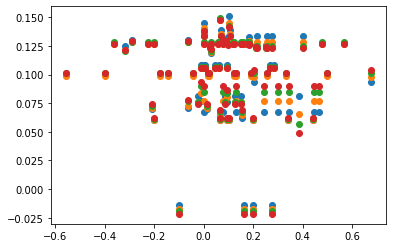

In [81]:
for i in range(4):
    print('run through', +i+1)
    plswork()
    model.fit(X_train, y_train, batch_size=10, epochs=250, verbose=1, validation_data=(X_test, y_test))
    model.evaluate(X_test, y_test)
    X_new = X_test
    y_proba = model.predict(X_new)
    plt.scatter(y_test3,y_proba)
    plt.savefig('testrun[i].png')            
    correlation = stats.pearsonr(y_proba.flatten(), y_test.flatten())[0]
    print(correlation)
    correlations.append(correlation)

### It works :D Not perfectly, but it works!

## 1/2/21 Here is where I test adding all the y_proba values to an array of arrays, so that I can compare lots of predicted values to the test set

In [87]:
y_predictions = [[],[],[],[],[]]

def plswork():
    global X_train3, X_test3, y_train3, y_test3
    NLPdata = pd.read_csv('nlpdata.csv')
    NLPdata = NLPdata.to_numpy()
    model = load_model('my_model.h5')
    X_train3, X_test3, y_train3, y_test3 = model_selection.train_test_split(NLPdata[:,0:2], NLPdata[:,2], train_size=0.75,test_size=0.25, random_state=101)
    X_train3 = X_train3.reshape(-1,2)
    y_train3 = y_train3.reshape(-1,1)
    X_test3 = X_test3.reshape(-1,2)
    y_test3 = y_test3.reshape(-1,1)
    return X_train3, X_test3, y_train3, y_test3

In [88]:
for i in range(4):
    print('run through', +i+1)
    plswork()
    model.fit(X_train, y_train, batch_size=10, epochs=250, verbose=1, validation_data=(X_test, y_test))
    model.evaluate(X_test, y_test)
    X_new = X_test
    y_proba = model.predict(X_new)
    #plt.scatter(y_test3,y_proba)
    #plt.savefig('testrun[i].png')            
    #correlation = stats.pearsonr(y_proba.flatten(), y_test.flatten())[0]
    print(y_proba)
    y_predictions.append(y_proba)

run through 1
Epoch 1/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0383 - val_loss: 0.0452
Epoch 2/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0383 - val_loss: 0.0452
Epoch 3/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0383 - val_loss: 0.0452
Epoch 4/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0383 - val_loss: 0.0452
Epoch 5/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0383 - val_loss: 0.0452
Epoch 6/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0383 - val_loss: 0.0452
Epoch 7/250
28/28 [==============================] - 0s 8ms/step - loss: 0.0383 - val_loss: 0.0452
Epoch 8/250
28/28 [==============================] - 0s 7ms/step - loss: 0.0382 - val_loss: 0.0452
Epoch 9/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0383 - val_loss: 0.0452
Epoch 10/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0383 - val_loss: 0.

Epoch 83/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0452
Epoch 84/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0452
Epoch 85/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0452
Epoch 86/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0452
Epoch 87/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0452
Epoch 88/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0452
Epoch 89/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0452
Epoch 90/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0452
Epoch 91/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0452
Epoch 92/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0453


28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0452
Epoch 246/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 247/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0452
Epoch 248/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0452
Epoch 249/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0452
Epoch 250/250
3/3 [==============================] - 0s 1ms/step - loss: 0.0452
[[-0.02754722]
 [ 0.10669389]
 [ 0.10261694]
 [ 0.13106667]
 [ 0.10261694]
 [ 0.10669389]
 [ 0.10261694]
 [ 0.07605113]
 [ 0.11980337]
 [ 0.10261694]
 [ 0.10046075]
 [ 0.10669389]
 [ 0.14776427]
 [ 0.10261694]
 [ 0.10261694]
 [ 0.12802748]
 [ 0.12802748]
 [ 0.09937526]
 [ 0.09937526]
 [ 0.07605113]
 [ 0.12622625]
 [ 0.1351083 ]
 [ 0.09937526]
 [ 0.10261694]
 [ 0.11376019]
 [ 0.11376019]
 [ 0.09937526]
 [ 0.12622625]
 [ 0.1280

28/28 [==============================] - 0s 7ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 144/250
28/28 [==============================] - 0s 7ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 145/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 146/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 147/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 148/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 149/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 150/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 151/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 152/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0453
Epoc

28/28 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 42/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 43/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 44/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 45/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 46/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 47/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 48/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 49/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 50/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 51/250


Epoch 123/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 124/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 125/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 126/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 127/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 128/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 129/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 130/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 131/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 132/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_los

28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 205/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 206/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 207/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 208/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 209/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 210/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 211/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 212/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 213/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0453
Epoc

28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 22/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 23/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 24/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 25/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 26/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 27/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 28/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 29/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 30/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 31/250


Epoch 103/250
28/28 [==============================] - 0s 9ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 104/250
28/28 [==============================] - 0s 8ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 105/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 106/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 107/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 108/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 109/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 110/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 111/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 112/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0382 - val_los

28/28 [==============================] - 0s 5ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 185/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 186/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 187/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 188/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 189/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 190/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 191/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 192/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0453
Epoch 193/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.0453
Epoc

In [89]:
print(y_predictions)

[[], [], [], [], [], array([[-0.02754722],
       [ 0.10669389],
       [ 0.10261694],
       [ 0.13106667],
       [ 0.10261694],
       [ 0.10669389],
       [ 0.10261694],
       [ 0.07605113],
       [ 0.11980337],
       [ 0.10261694],
       [ 0.10046075],
       [ 0.10669389],
       [ 0.14776427],
       [ 0.10261694],
       [ 0.10261694],
       [ 0.12802748],
       [ 0.12802748],
       [ 0.09937526],
       [ 0.09937526],
       [ 0.07605113],
       [ 0.12622625],
       [ 0.1351083 ],
       [ 0.09937526],
       [ 0.10261694],
       [ 0.11376019],
       [ 0.11376019],
       [ 0.09937526],
       [ 0.12622625],
       [ 0.12802748],
       [ 0.06048722],
       [ 0.07605137],
       [ 0.10402516],
       [ 0.10261694],
       [-0.02754722],
       [ 0.07336535],
       [ 0.09219891],
       [ 0.06048722],
       [ 0.07336535],
       [ 0.07605113],
       [ 0.13106667],
       [ 0.02626448],
       [ 0.06048722],
       [ 0.10669389],
       [ 0.12802748],
       [ 0.

In [90]:
np.shape(y_predictions)

/Users/jillianmellen/.pyenv/versions/3.8.0/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(9,)

In [91]:
np.size(y_predictions)

9

### not sure that worked as intended, honestly

## 1/3/21 histograms?

In [28]:
def plswork():
    global X_train, X_test, y_train, y_test
    NLPdata = pd.read_csv('nlpdata.csv')
    NLPdata = NLPdata.to_numpy()
    model = load_model('my_model.h5')
    X_train, X_test, y_train, y_test = model_selection.train_test_split(NLPdata[:,0:2], NLPdata[:,2], train_size=0.70,test_size=0.30, random_state=101)
    X_train = X_train.reshape(-1,2)
    y_train = y_train.reshape(-1,1)
    X_test = X_test.reshape(-1,2)
    y_test = y_test.reshape(-1,1)
    return X_train, X_test, y_train, y_test

Run through 1
Epoch 1/250
26/26 [==============================] - 0s 4ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 2/250
26/26 [==============================] - 0s 4ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 3/250
26/26 [==============================] - 0s 4ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 4/250
26/26 [==============================] - 0s 4ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 5/250
26/26 [==============================] - 0s 4ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 6/250
26/26 [==============================] - 0s 4ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 7/250
26/26 [==============================] - 0s 4ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 8/250
26/26 [==============================] - 0s 4ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 9/250
26/26 [==============================] - 0s 4ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 10/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.

Epoch 83/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 84/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 85/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 86/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 87/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 88/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 89/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 90/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 91/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 92/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386


26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 165/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 166/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 167/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 168/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 169/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 170/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 171/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 172/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 173/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoc

26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 246/250
26/26 [==============================] - 0s 4ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 247/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 248/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 249/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 250/250
4/4 [==============================] - 0s 1ms/step - loss: 0.0386
[[0.07032795]
 [0.15537831]
 [0.07918863]
 [0.10827498]
 [0.07918863]
 [0.15537831]
 [0.07918863]
 [0.09978946]
 [0.12260467]
 [0.07918863]
 [0.12623264]
 [0.15537831]
 [0.10850533]
 [0.07918863]
 [0.07918863]
 [0.1247299 ]
 [0.1247299 ]
 [0.14534348]
 [0.14534348]
 [0.09978946]
 [0.08085154]
 [0.15960123]
 [0.14534348]
 [0.07918863]
 [0.17553003]
 [0.17553003]
 [0.14534348]
 [0.08085154]
 [0.1247299 ]
 [0.06167627]
 [0.09978

Epoch 61/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 62/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 63/250
26/26 [==============================] - 0s 4ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 64/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 65/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 66/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 67/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 68/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 69/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 70/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386


26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 143/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 144/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 145/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 146/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 147/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 148/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 149/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 150/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 151/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoc

26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 224/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 225/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 226/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 227/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 228/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 229/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 230/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 231/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 232/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoc

26/26 [==============================] - 0s 6ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 39/250
26/26 [==============================] - 0s 6ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 40/250
26/26 [==============================] - 0s 6ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 41/250
26/26 [==============================] - 0s 7ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 42/250
26/26 [==============================] - 0s 7ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 43/250
26/26 [==============================] - 0s 7ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 44/250
26/26 [==============================] - 0s 6ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 45/250
26/26 [==============================] - 0s 6ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 46/250
26/26 [==============================] - 0s 6ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 47/250
26/26 [==============================] - 0s 8ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 48/250


Epoch 120/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 121/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 122/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 123/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 124/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 125/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 126/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 127/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 128/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 129/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_los

26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 202/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 203/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 204/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 205/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 206/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 207/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 208/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 209/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 210/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoc

26/26 [==============================] - 0s 7ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 17/250
26/26 [==============================] - 0s 6ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 18/250
26/26 [==============================] - 0s 6ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 19/250
26/26 [==============================] - 0s 6ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 20/250
26/26 [==============================] - 0s 6ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 21/250
26/26 [==============================] - 0s 6ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 22/250
26/26 [==============================] - 0s 7ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 23/250
26/26 [==============================] - 0s 8ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 24/250
26/26 [==============================] - 0s 17ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 25/250
26/26 [==============================] - 0s 7ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 26/250

26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 99/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 100/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 101/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 102/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 103/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 104/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 105/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 106/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 107/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch

26/26 [==============================] - 0s 6ms/step - loss: 0.0405 - val_loss: 0.0386
Epoch 180/250
26/26 [==============================] - 0s 9ms/step - loss: 0.0405 - val_loss: 0.0386
Epoch 181/250
26/26 [==============================] - 0s 6ms/step - loss: 0.0405 - val_loss: 0.0386
Epoch 182/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 183/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0386
Epoch 184/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0405 - val_loss: 0.0386
Epoch 185/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0405 - val_loss: 0.0386
Epoch 186/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0405 - val_loss: 0.0386
Epoch 187/250
26/26 [==============================] - 0s 3ms/step - loss: 0.0405 - val_loss: 0.0386
Epoch 188/250
26/26 [==============================] - 0s 4ms/step - loss: 0.0405 - val_loss: 0.0386
Epoc

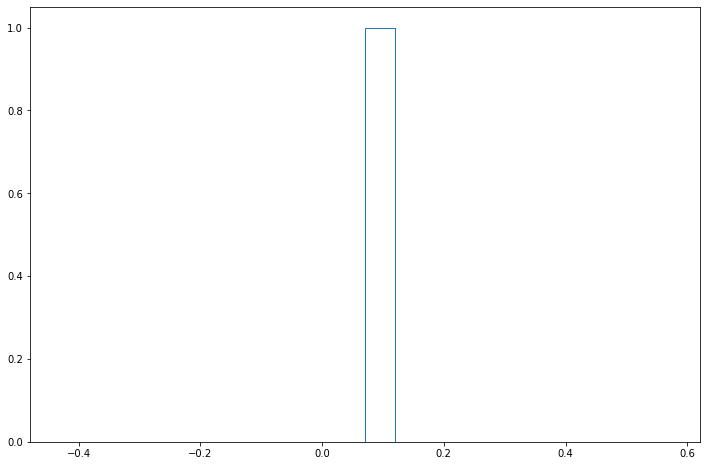

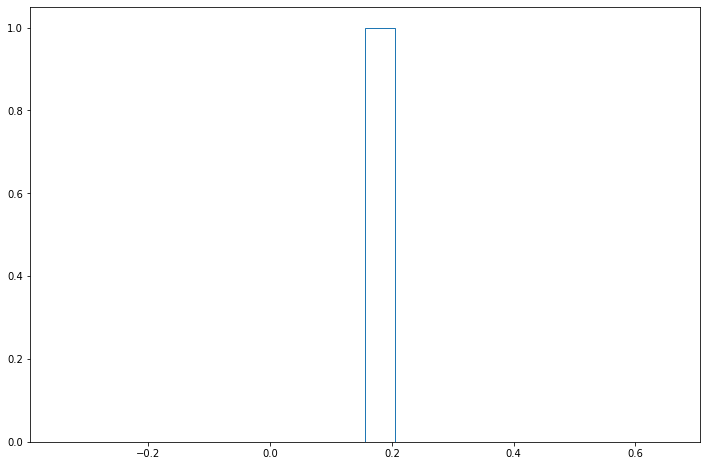

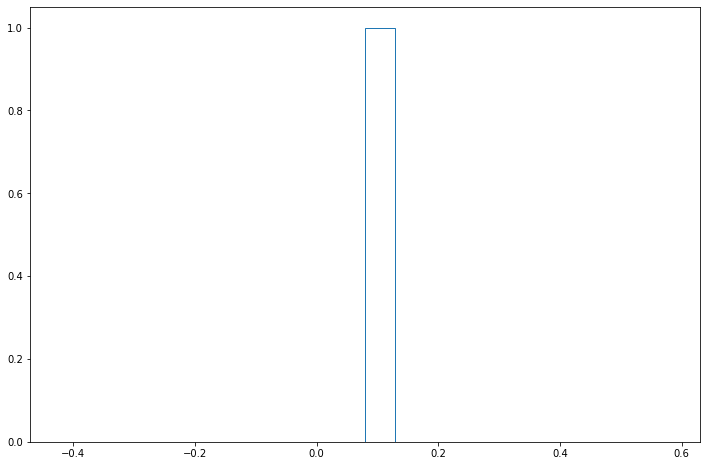

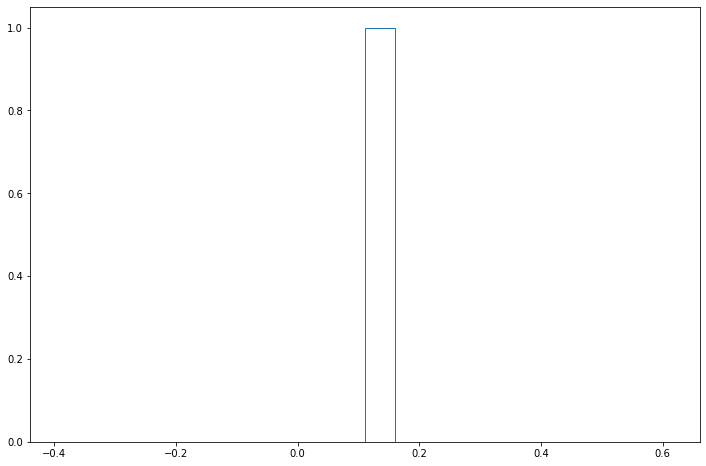

In [46]:
prediction = np.zeros((1,1))

for i in range(4):
    print('Run through', +i+1)
    plswork()
    model.fit(X_train, y_train, batch_size=10, epochs=250, verbose=1, validation_data=(X_test, y_test))
    model.evaluate(X_test, y_test)
    X_new = X_test
    y_proba = model.predict(X_new)
    plt.figure(figsize=(12,8))
    plt.hist(y_proba[i], bins=20, histtype='step')
    plt.savefig('hists3.png')            
    #correlation = stats.pearsonr(y_proba.flatten(), y_test.flatten())[0]
    print(y_proba)
    predictions = np.append(prediction, y_proba) #, axis = i

In [37]:
prediction.shape

(2, 2, 1)

In [26]:
predictions

array([4.59080000e+02, 7.42881671e-02, 1.51700169e-01, 7.97173530e-02,
       9.19423401e-02, 7.97173530e-02, 1.51700169e-01, 7.97173530e-02,
       1.00125775e-01, 1.12691745e-01, 7.97173530e-02, 1.34601459e-01,
       1.51700169e-01, 9.64504853e-02, 7.97173530e-02, 7.97173530e-02,
       1.18602782e-01, 1.18602782e-01, 1.50830388e-01, 1.50830388e-01,
       1.00125775e-01, 5.89711703e-02, 1.41215548e-01, 1.50830388e-01,
       7.97173530e-02, 1.68977618e-01, 1.68977618e-01, 1.50830388e-01,
       5.89711703e-02, 1.18602782e-01, 7.08704889e-02, 1.00125827e-01,
       1.03313155e-01, 7.97173530e-02, 7.42881671e-02, 4.83085550e-02,
       6.98727816e-02, 7.08704889e-02, 4.83085550e-02, 1.00125775e-01,
       9.19423401e-02, 1.99028533e-02, 7.08704889e-02, 1.51700169e-01,
       1.18602782e-01, 7.97173530e-02, 1.05295554e-01, 1.18602782e-01,
       7.97173530e-02, 1.03313304e-01, 7.08704889e-02, 7.97173530e-02,
       1.50830388e-01, 1.50830388e-01, 1.18602782e-01, 1.18602782e-01,
      

In [24]:
y_proba.shape

(92, 1)

In [25]:
len(y_proba)

92

In [49]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import sklearn.model_selection as model_selection
from scipy import stats
from keras.models import load_model

NLPdata = pd.read_csv('nlpdata.csv')
NLPdata = NLPdata.to_numpy()

In [50]:
model = Sequential()
model.add(Dense(5, activation='selu', input_dim=2))
model.add(Dense(5, activation='selu'))
model.add(Dense(5, activation='selu'))
model.add(Dense(5, activation='selu'))
model.add(Dense(5, activation='selu'))
model.add(Dense(5, activation='selu'))
model.add(Dense(5, activation='selu'))
model.add(Dense(1, activation='linear')) 
#model.add(Dense(10, activation='softmax'))
model.compile(loss='mean_squared_error', optimizer='adagrad')
model.summary()

model.save('my_model.h5')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 5)                 15        
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_18 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_20 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_22 (Dense)             (None, 5)                

In [62]:
def plswork():
    global X_train, X_test, y_train, y_test
    NLPdata = pd.read_csv('nlpdata.csv')
    NLPdata = NLPdata.to_numpy()
    model = load_model('my_model.h5')
    X_train, X_test, y_train, y_test = model_selection.train_test_split(NLPdata[:,0:2], NLPdata[:,2], train_size=0.75,test_size=0.25, random_state=101)
    X_train = X_train.reshape(-1,2)
    y_train = y_train.reshape(-1,1)
    X_test = X_test.reshape(-1,2)
    y_test = y_test.reshape(-1,1)
    return X_train, X_test, y_train, y_test

Run through 1
Epoch 1/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0386 - val_loss: 0.0458
Epoch 2/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0386 - val_loss: 0.0458
Epoch 3/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0386 - val_loss: 0.0458
Epoch 4/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0458
Epoch 5/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0458
Epoch 6/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0386 - val_loss: 0.0458
Epoch 7/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0386 - val_loss: 0.0458
Epoch 8/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0386 - val_loss: 0.0458
Epoch 9/250
28/28 [==============================] - 0s 5ms/step - loss: 0.0386 - val_loss: 0.0458
Epoch 10/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.

Epoch 83/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0458
Epoch 84/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0458
Epoch 85/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0458
Epoch 86/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0458
Epoch 87/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0458
Epoch 88/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0458
Epoch 89/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0458
Epoch 90/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0458
Epoch 91/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0458
Epoch 92/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0458


28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0458
Epoch 165/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0386 - val_loss: 0.0458
Epoch 166/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0458
Epoch 167/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0458
Epoch 168/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0458
Epoch 169/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0458
Epoch 170/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0458
Epoch 171/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0458
Epoch 172/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0386 - val_loss: 0.0458
Epoch 173/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0458
Epoc

28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0459
Epoch 246/250
28/28 [==============================] - 0s 4ms/step - loss: 0.0386 - val_loss: 0.0459
Epoch 247/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0459
Epoch 248/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0459
Epoch 249/250
28/28 [==============================] - 0s 3ms/step - loss: 0.0386 - val_loss: 0.0459
Epoch 250/250
3/3 [==============================] - 0s 1ms/step - loss: 0.0459
[[ 0.08849408]
 [ 0.1053841 ]
 [ 0.10291264]
 [ 0.18045856]
 [ 0.10291264]
 [ 0.1053841 ]
 [ 0.10291264]
 [ 0.07563582]
 [ 0.05256478]
 [ 0.10291264]
 [ 0.08382869]
 [ 0.1053841 ]
 [ 0.13598563]
 [ 0.10291264]
 [ 0.10291264]
 [ 0.12148872]
 [ 0.12148872]
 [ 0.08873758]
 [ 0.08873758]
 [ 0.07563582]
 [ 0.19006754]
 [ 0.19171819]
 [ 0.08873758]
 [ 0.10291264]
 [ 0.08267654]
 [ 0.08267654]
 [ 0.08873758]
 [ 0.19006754]
 [ 0.1214

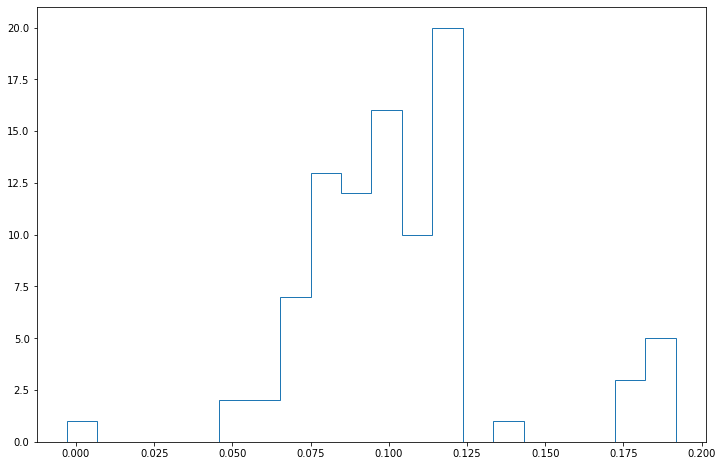

In [69]:
#prediction = np.zeros((1,1))

for i in range(1):
    print('Run through', +i+1)
    plswork()
    model.fit(X_train, y_train, batch_size=10, epochs=250, verbose=1, validation_data=(X_test, y_test))
    model.evaluate(X_test, y_test)
    X_new = X_test
    y_proba = model.predict(X_new)
    plt.figure(figsize=(12,8))
    plt.hist(y_proba, bins=20, histtype='step')
    plt.savefig('hists4[i].png')            
    #correlation = stats.pearsonr(y_proba.flatten(), y_test.flatten())[0]
    print(y_proba)
    predict = np.vstack(y_proba)
    predictions = np.hstack(predict) #, axis = i

In [70]:
print(y_proba.shape)
print(predict.shape)
print(predictions.shape)

(92, 1)
(92, 1)
(92,)


In [71]:
print(y_proba)

[[ 0.08849408]
 [ 0.1053841 ]
 [ 0.10291264]
 [ 0.18045856]
 [ 0.10291264]
 [ 0.1053841 ]
 [ 0.10291264]
 [ 0.07563582]
 [ 0.05256478]
 [ 0.10291264]
 [ 0.08382869]
 [ 0.1053841 ]
 [ 0.13598563]
 [ 0.10291264]
 [ 0.10291264]
 [ 0.12148872]
 [ 0.12148872]
 [ 0.08873758]
 [ 0.08873758]
 [ 0.07563582]
 [ 0.19006754]
 [ 0.19171819]
 [ 0.08873758]
 [ 0.10291264]
 [ 0.08267654]
 [ 0.08267654]
 [ 0.08873758]
 [ 0.19006754]
 [ 0.12148872]
 [ 0.07414129]
 [ 0.07563582]
 [ 0.08226052]
 [ 0.10291264]
 [ 0.08849408]
 [ 0.06501523]
 [ 0.09647604]
 [ 0.07414129]
 [ 0.06501523]
 [ 0.07563582]
 [ 0.18045856]
 [-0.00287181]
 [ 0.07414129]
 [ 0.1053841 ]
 [ 0.12148872]
 [ 0.10291264]
 [ 0.11952971]
 [ 0.12148872]
 [ 0.10291264]
 [ 0.08226052]
 [ 0.07414129]
 [ 0.10291264]
 [ 0.08873758]
 [ 0.08873758]
 [ 0.12148872]
 [ 0.12148872]
 [ 0.08873758]
 [ 0.11952971]
 [ 0.08267654]
 [ 0.08267654]
 [ 0.12148872]
 [ 0.10291264]
 [ 0.1053841 ]
 [ 0.0525649 ]
 [ 0.1900676 ]
 [ 0.08849408]
 [ 0.12148872]
 [ 0.12148

In [73]:
print(predict)

[[ 0.08849408]
 [ 0.1053841 ]
 [ 0.10291264]
 [ 0.18045856]
 [ 0.10291264]
 [ 0.1053841 ]
 [ 0.10291264]
 [ 0.07563582]
 [ 0.05256478]
 [ 0.10291264]
 [ 0.08382869]
 [ 0.1053841 ]
 [ 0.13598563]
 [ 0.10291264]
 [ 0.10291264]
 [ 0.12148872]
 [ 0.12148872]
 [ 0.08873758]
 [ 0.08873758]
 [ 0.07563582]
 [ 0.19006754]
 [ 0.19171819]
 [ 0.08873758]
 [ 0.10291264]
 [ 0.08267654]
 [ 0.08267654]
 [ 0.08873758]
 [ 0.19006754]
 [ 0.12148872]
 [ 0.07414129]
 [ 0.07563582]
 [ 0.08226052]
 [ 0.10291264]
 [ 0.08849408]
 [ 0.06501523]
 [ 0.09647604]
 [ 0.07414129]
 [ 0.06501523]
 [ 0.07563582]
 [ 0.18045856]
 [-0.00287181]
 [ 0.07414129]
 [ 0.1053841 ]
 [ 0.12148872]
 [ 0.10291264]
 [ 0.11952971]
 [ 0.12148872]
 [ 0.10291264]
 [ 0.08226052]
 [ 0.07414129]
 [ 0.10291264]
 [ 0.08873758]
 [ 0.08873758]
 [ 0.12148872]
 [ 0.12148872]
 [ 0.08873758]
 [ 0.11952971]
 [ 0.08267654]
 [ 0.08267654]
 [ 0.12148872]
 [ 0.10291264]
 [ 0.1053841 ]
 [ 0.0525649 ]
 [ 0.1900676 ]
 [ 0.08849408]
 [ 0.12148872]
 [ 0.12148

In [74]:
print(predictions)

[ 0.08849408  0.1053841   0.10291264  0.18045856  0.10291264  0.1053841
  0.10291264  0.07563582  0.05256478  0.10291264  0.08382869  0.1053841
  0.13598563  0.10291264  0.10291264  0.12148872  0.12148872  0.08873758
  0.08873758  0.07563582  0.19006754  0.19171819  0.08873758  0.10291264
  0.08267654  0.08267654  0.08873758  0.19006754  0.12148872  0.07414129
  0.07563582  0.08226052  0.10291264  0.08849408  0.06501523  0.09647604
  0.07414129  0.06501523  0.07563582  0.18045856 -0.00287181  0.07414129
  0.1053841   0.12148872  0.10291264  0.11952971  0.12148872  0.10291264
  0.08226052  0.07414129  0.10291264  0.08873758  0.08873758  0.12148872
  0.12148872  0.08873758  0.11952971  0.08267654  0.08267654  0.12148872
  0.10291264  0.1053841   0.0525649   0.1900676   0.08849408  0.12148872
  0.12148872  0.07414129  0.08873758  0.1053841   0.18045856  0.12148872
  0.1053841   0.09908482  0.12148872  0.07414129  0.08047833  0.1053841
  0.12148872  0.11952971  0.10291264  0.09904604  0.10